# Support Vector Machine
This is the code for the "Classifying Data using a Support Vector Machine"

## Overview

This is the code on how to use a Support Vector Machine to classify some data. Basically, we create an n-1 dimensional hyperplane that linearly seperates a set of classes in n-dimensional space.\This model is able to tell what category something is of, be that text or numbers or videos or images. 

It's a supervised machine learning algorithm which can be used for Classification, regression (time series prediction, etc) , outlier detection, clustering

SVMs are great for relatively small data sets with fewer outliers. 
Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.

![alt text](https://image.slidesharecdn.com/mscpresentation-140722065852-phpapp01/95/msc-presentation-bioinformatics-7-638.jpg?cb=1406012610 "Logo Title Text 1")

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

## Dependencies

* numpy
* matplotlib

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Data
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Labels
y = np.array([-1,-1,1,1,1])

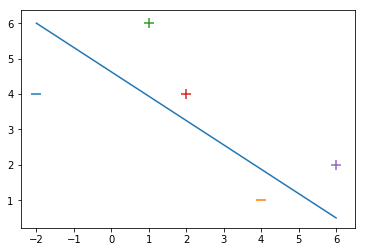

In [3]:
#plotting X
for d, sample in enumerate(X):
    #negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#take two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [4]:
for i, x in enumerate(X):
    print i,x

0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]


In [5]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w


In [6]:
for d, sample in enumerate(X):
    print d,sample
    
print X

0 [-2  4 -1]
1 [ 4  1 -1]
2 [ 1  6 -1]
3 [ 2  4 -1]
4 [ 6  2 -1]
[[-2  4 -1]
 [ 4  1 -1]
 [ 1  6 -1]
 [ 2  4 -1]
 [ 6  2 -1]]


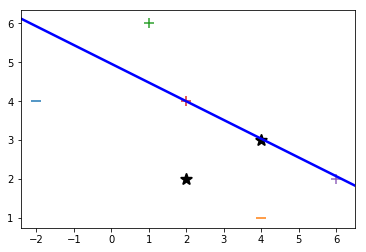

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='*', linewidths=2, color='black')
plt.scatter(4,3, s=120, marker='*', linewidths=2, color='black')


# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

/home/shubhijain/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


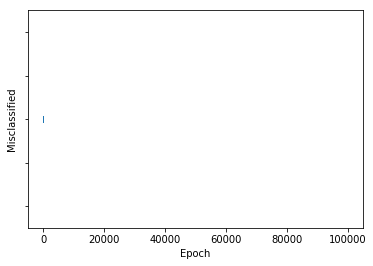

In [9]:
w = svm_sgd_plot(X,y)